In [1]:
import numpy as np
from math import sqrt
from scipy.stats import norm
from scipy.stats import chi2

In [4]:
media = np.array([1,1])
covariancia = np.array([[1,0],[0,1]])
y = np.random.multivariate_normal(mean = media,  cov = covariancia, size = 1000)

In [6]:
def mardia(x):
  x_barra = np.mean(x, axis = 0)
  n = len(x)
  k = len(x[0])
  s = 0
  for d in range(0,n):
    s_1 = x[d] - x_barra
    s += np.dot(s_1[:,None],s_1[None,:])
  s = s/n    

  s_inv = np.linalg.inv(s)
  skew = 0 
  for c in range(0, n):
    for d in range(0, n):
      m_i = x[c] - x_barra
      m_j = x[d] - x_barra
      m_1 = np.matmul(m_i, s_inv)
      m = np.matmul(m_1, m_j)
      skew += m**3
  skew = skew/(n**2)
  kurt = 0
  for c in range(0, n):
      m_i = x[c] - x_barra
      m_1 = np.matmul(m_i, s_inv)
      m = np.matmul(m_1, m_i)
      kurt += m**2
  kurt = kurt/n
  kurt = (kurt - k*(k+2))*sqrt(n/(8*k*(k+2)))
  if n < 20:
    c = ((n+1)*(n+3)*(k+1))/(n*(n+1)*(k+1)-6)
    skew = skew*n*c/6
  else:
    skew = skew*n/6
  p_valor_kurt = norm.cdf(kurt)
  df = k*(k+1)*(k+2)/6
  p_valor_skew = 1 - chi2.cdf(skew, df = df)
  if p_valor_kurt < 0.5:
    p_valor_kurt = p_valor_kurt*2
  else:
    p_valor_kurt = (1-p_valor_kurt)*2

  return skew, p_valor_skew , kurt, p_valor_kurt


In [7]:
teste = mardia(y)

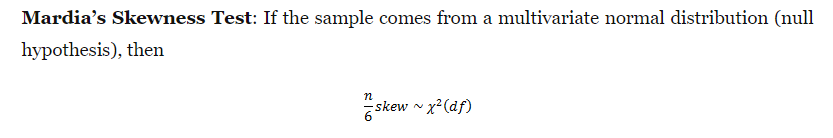

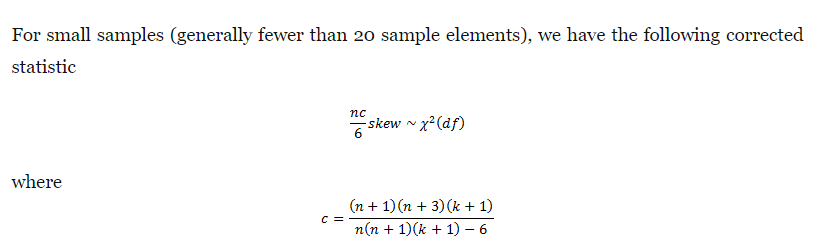

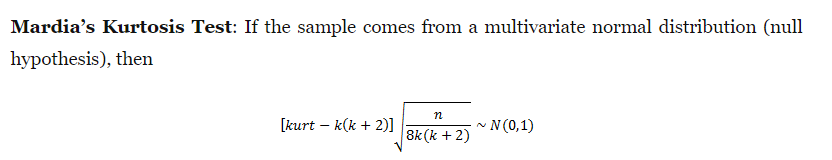

Nesse caso, skew e kurt são as estatísticas de teste mostradas acima que seguem as respectivas distribuições. O valor de kurt em comparação com funções de bibliotecas do R é diferente pois a estatística usada por esses pacotes é um pouco diferente assim como o fator de correção "c". O valor de skew da nossa função implementada é igual a dos outros pacotes no caso em que temos mais de 20 observaçoes, caso contrário os valores não coincidem pois o valor de c utilizado é diferente.

In [8]:
print('skew:', teste[0] , '     p-valor:', teste[1])
print('kurt:', teste[2], '    p-valor:', teste[3])

skew: 8.374935618867752      p-valor: 0.07877007372562361
kurt: 1.5919514318179429     p-valor: 0.11139561787062124
